Warehouse management using Python 
Objectives: 
(i)find the total no: of sales of each size in each country for male.
(ii)find the total no: of sales of each size in each country for female.
(iii)find the total no: of shoe sales for female in 2014.
(iv)find the total no: of shoe sales for "Size (UK)" for female in 2014.
(v)find the total no: of shoe sales in "UK" for "Size (UK)" for female in 2014.
(vi)find whether month has an impact on female shoe sales in "UK" for "Size (UK)" in 2014.
(vii)visualise (vi) using heatmap.
(vii)visualize barplot illustrating how demand is distributed across "Size (UK)" female shoes in 2014 in "UK".


In [2]:
#Importing packages and datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab as pl


In [3]:
#importing dataset
data_sales = pd.read_csv("Al-Bundy_raw-data.csv")

In [4]:
#CLEANING THE DATASET
#first--inspect data
data_sales

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0


In [5]:
#check datatype of each column
data_sales.dtypes

InvoiceNo          int64
Date              object
Country           object
ProductID          int64
Shop              object
Gender            object
Size (US)        float64
Size (Europe)     object
Size (UK)        float64
UnitPrice          int64
Discount         float64
Year               int64
Month              int64
SalePrice        float64
dtype: object

In [6]:
#convert Date datatype to date time using to_datetime()function from pandas package
data_sales["Date"] = pd.to_datetime(data_sales["Date"])
#inspecting whether change occured or not
data_sales.dtypes
data_sales.head()


,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [7]:
#checking any missing data
data_sales.isnull().sum()

InvoiceNo        0
Date             0
Country          0
ProductID        0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
dtype: int64

The data set doesn't have any null values.

In [8]:
#dropping any columns we don't expect to use
data_req = data_sales.drop(["InvoiceNo", "Date", "ProductID", "Size (Europe)","Size (US)", "UnitPrice",	"Discount"], axis=1)
data_req

,Country,Shop,Gender,Size (UK),Year,Month,SalePrice
0,United Kingdom,UK2,Male,10.5,2014,1,159.0
1,United States,US15,Male,11.0,2014,1,159.2
2,Canada,CAN7,Male,9.0,2014,1,119.2
3,United States,US6,Female,7.5,2014,1,159.0
4,United Kingdom,UK4,Female,7.0,2014,1,159.0
...,...,...,...,...,...,...,...
14962,United Kingdom,UK2,Male,9.0,2016,12,139.0
14963,United States,US12,Female,10.0,2016,12,149.0
14964,Canada,CAN6,Male,10.0,2016,12,125.3
14965,Germany,GER1,Female,7.5,2016,12,199.0


Data is ready to analyse.

DATA ANALYSIS AND VISUALISATION









The interpretation of shoe sizes varies depending on gender, so to effectively analyze our data, we need to split the "data_req" dataset into separate data frames based on gender.

In [9]:
data_req_male = data_req[data_req["Gender"]== "Male"]
data_req_female = data_req[data_req["Gender"]== "Female"]

In [10]:
data_req_male

,Country,Shop,Gender,Size (UK),Year,Month,SalePrice
0,United Kingdom,UK2,Male,10.5,2014,1,159.0
1,United States,US15,Male,11.0,2014,1,159.2
2,Canada,CAN7,Male,9.0,2014,1,119.2
5,United States,US15,Male,10.0,2014,1,159.0
7,Canada,CAN5,Male,9.5,2014,1,169.0
...,...,...,...,...,...,...,...
14958,Germany,GER2,Male,10.0,2016,12,89.5
14960,United States,US15,Male,8.5,2016,12,189.0
14961,United States,US13,Male,7.5,2016,12,129.0
14962,United Kingdom,UK2,Male,9.0,2016,12,139.0


In [11]:
data_req_female

,Country,Shop,Gender,Size (UK),Year,Month,SalePrice
3,United States,US6,Female,7.5,2014,1,159.0
4,United Kingdom,UK4,Female,7.0,2014,1,159.0
6,Germany,GER2,Female,7.0,2014,1,179.0
9,United Kingdom,UK1,Female,7.0,2014,1,149.0
11,United States,US11,Female,7.5,2014,1,152.1
...,...,...,...,...,...,...,...
14957,Germany,GER1,Female,5.5,2016,12,159.0
14959,United States,US13,Female,6.0,2016,12,119.2
14963,United States,US12,Female,10.0,2016,12,149.0
14965,Germany,GER1,Female,7.5,2016,12,199.0


In [12]:
#using pivot_table() from pandas library -- view the total no: of sales of each size in each country
#2 pivot table -- one for each gender
size_male_country = pd.pivot_table(data_req_male, values = "Month", index = ["Size (UK)"], columns = ["Country"], margins = True, margins_name = "Total",  aggfunc=len)
size_male_country

Country,Canada,Germany,United Kingdom,United States,Total
Size (UK),,,,,
5.5,15,30,6,54,105
6.0,15,18,12,45,90
6.5,24,30,21,39,114
7.0,45,48,12,66,171
7.5,51,117,45,141,354
8.0,192,174,87,225,678
8.5,324,348,183,492,1347
9.0,375,549,225,741,1890
9.5,237,411,156,543,1347


In [13]:
size_female_country = pd.pivot_table(data_req_female, values = "Month", index = ["Size (UK)"], columns = ["Country"], margins = True, margins_name = "Total", aggfunc = len)
size_female_country

Country,Canada,Germany,United Kingdom,United States,Total
Size (UK),,,,,
2.5,6,9,15,21,51
3.0,6,12,9,9,36
3.5,6,9,6,42,63
4.0,21,15,12,33,81
4.5,51,84,24,93,252
5.0,93,156,27,147,423
5.5,153,222,87,318,780
6.0,192,324,168,618,1302
6.5,171,339,129,399,1038


For the sake of this project we shall assume that sales across 'Gender', 'Country' and 'Year' are independent of one another.



So, now we shall focus on shoe sales in "Germany" in 2014.

In [14]:
#shoe sales for female in 2014
female_2014 = data_req_female[data_req_female["Year"]==2014]
female_2014

,Country,Shop,Gender,Size (UK),Year,Month,SalePrice
3,United States,US6,Female,7.5,2014,1,159.0
4,United Kingdom,UK4,Female,7.0,2014,1,159.0
6,Germany,GER2,Female,7.0,2014,1,179.0
9,United Kingdom,UK1,Female,7.0,2014,1,149.0
11,United States,US11,Female,7.5,2014,1,152.1
...,...,...,...,...,...,...,...
2740,Germany,GER2,Female,6.0,2014,12,132.3
2741,Germany,GER1,Female,3.0,2014,12,179.0
2745,Canada,CAN1,Female,5.5,2014,12,151.2
2746,United States,US13,Female,6.5,2014,12,199.0


In [15]:
#shoe sales for female in 2014 in United Kingdom
female_uk_2014 = female_2014[female_2014["Country"] == "United Kingdom"]
female_uk_2014 

,Country,Shop,Gender,Size (UK),Year,Month,SalePrice
4,United Kingdom,UK4,Female,7.0,2014,1,159.0
9,United Kingdom,UK1,Female,7.0,2014,1,149.0
31,United Kingdom,UK5,Female,6.0,2014,1,152.1
46,United Kingdom,UK2,Female,6.0,2014,1,199.0
72,United Kingdom,UK2,Female,6.5,2014,1,149.0
...,...,...,...,...,...,...,...
2647,United Kingdom,UK4,Female,6.0,2014,12,139.3
2709,United Kingdom,UK3,Female,8.0,2014,12,149.0
2712,United Kingdom,UK5,Female,6.0,2014,12,89.5
2714,United Kingdom,UK3,Female,8.0,2014,12,149.0


In [16]:
female_uk_2014_by_month = pd.pivot_table(female_uk_2014, values='Country', index=['Size (UK)'], columns=['Month'], fill_value=0, aggfunc=len)
female_uk_2014_by_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Size (UK),,,,,,,,,,,,
2.5,0,2,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,0,0,0,1,0,0,0,0,0
4.0,2,0,0,0,2,0,0,0,0,0,0,0
4.5,1,0,0,0,0,0,1,0,0,0,0,0
5.0,0,0,0,1,0,0,0,1,0,3,0,0
5.5,3,0,2,1,1,1,0,0,1,0,0,1
6.0,2,2,4,0,0,3,0,4,7,2,0,7
6.5,2,1,1,6,8,0,5,0,2,0,0,4
7.0,3,0,1,5,5,0,2,0,3,1,3,0


To make the data distribution more clearer we shall display our dataframe in a heatmap from the seaborn library. This indicate Month can effect the demand.

<Axes: xlabel='Month', ylabel='Size (UK)'>

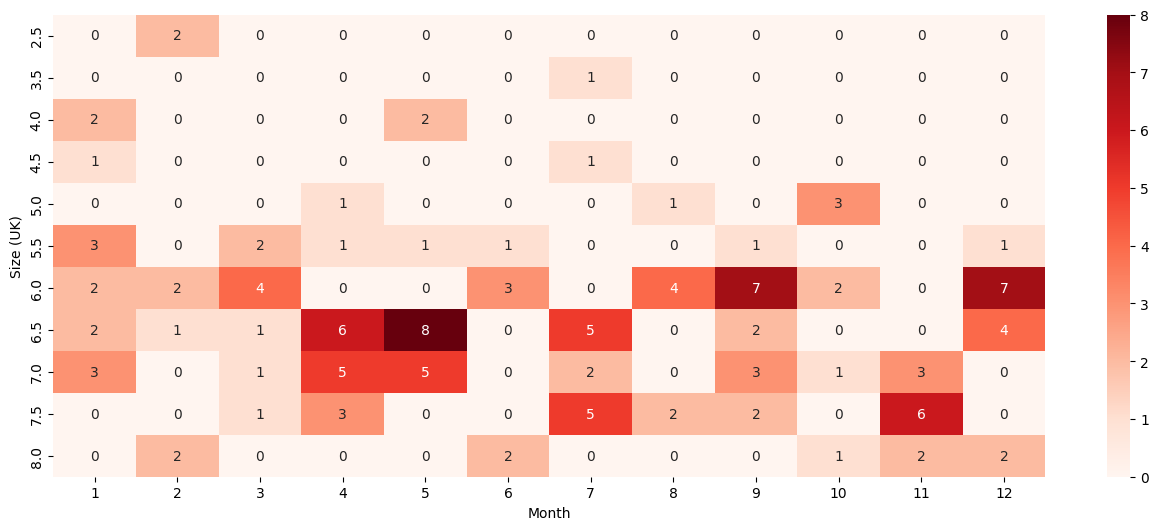

In [23]:
plt.figure(figsize = (16, 6))
sns.heatmap(female_uk_2014_by_month, annot = True, fmt = "g",  cmap = "Reds")

'Month' can effect demand, however it is also clear that the overwhelming influence on demand is 'Size (UK)'.

Using barplot illustrating how demand is distributed across "Size (UK)".

In [25]:
female_disuk_2014_month= pd.pivot_table(female_uk_2014, values='Country', index=['Size (UK)'], columns=['Month'], fill_value=0, margins = True, margins_name= 'Total', aggfunc=len)
female_disuk_2014_month

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total
Size (UK),,,,,,,,,,,,,
2.5,0,2,0,0,0,0,0,0,0,0,0,0,2
3.5,0,0,0,0,0,0,1,0,0,0,0,0,1
4.0,2,0,0,0,2,0,0,0,0,0,0,0,4
4.5,1,0,0,0,0,0,1,0,0,0,0,0,2
5.0,0,0,0,1,0,0,0,1,0,3,0,0,5
5.5,3,0,2,1,1,1,0,0,1,0,0,1,10
6.0,2,2,4,0,0,3,0,4,7,2,0,7,31
6.5,2,1,1,6,8,0,5,0,2,0,0,4,29
7.0,3,0,1,5,5,0,2,0,3,1,3,0,23


In [26]:
#selecting rows except the last one
female_acr_disuk_2014_month = female_disuk_2014_month.iloc[:-1, :]
female_acr_disuk_2014_month

Month,1,2,3,4,5,6,7,8,9,10,11,12,Total
Size (UK),,,,,,,,,,,,,
2.5,0,2,0,0,0,0,0,0,0,0,0,0,2
3.5,0,0,0,0,0,0,1,0,0,0,0,0,1
4.0,2,0,0,0,2,0,0,0,0,0,0,0,4
4.5,1,0,0,0,0,0,1,0,0,0,0,0,2
5.0,0,0,0,1,0,0,0,1,0,3,0,0,5
5.5,3,0,2,1,1,1,0,0,1,0,0,1,10
6.0,2,2,4,0,0,3,0,4,7,2,0,7,31
6.5,2,1,1,6,8,0,5,0,2,0,0,4,29
7.0,3,0,1,5,5,0,2,0,3,1,3,0,23


Text(0, 0.5, 'Frequency')

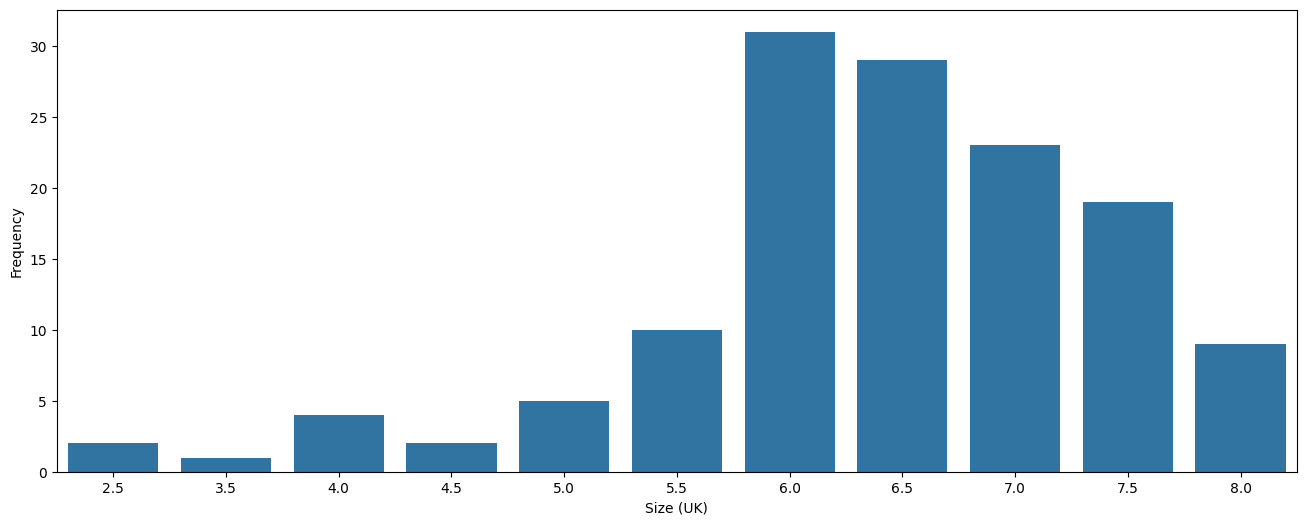

In [29]:
plt.figure(figsize = (16, 6))
sns.barplot(female_acr_disuk_2014_month, x = "Size (UK)", y = "Total")
plt.ylabel("Frequency")